In [ ]:
# Exercise 16.1
import numpy as np
v = np.array([5.00512567e-06, 3.94168539e-05, 5.57124430e-09, 9.31981207e-09,
9.98060276e-01, 9.10328786e-07, 1.56262695e-03, 1.82976466e-04,
1.48519455e-04, 2.54354113e-07])
list(v).index(max(list(v)))

4

Solution from the book  
The largest number in this array is 9.98060276e–01, or approxi-
mately 0.998, which appears fifth, or in index 4. Therefore, this output says the  
  
image is classified as a 4.

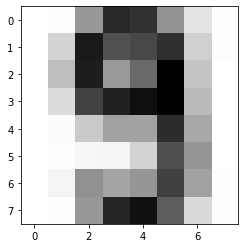

In [ ]:
# Exercise 16.2—Mini Project
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
nines = 0
zeros = np.zeros(64)

for target in digits.target:
  if target == 9:
    nines += 1
for img, target in zip(digits.images, digits.target):
  if target == 9:
    tmp = np.matrix.flatten(img) / 15.
    zeros += tmp/nines

zeros = zeros * 15
zeros = zeros.reshape(8,8)
plt.imshow(zeros, cmap=plt.cm.gray_r)

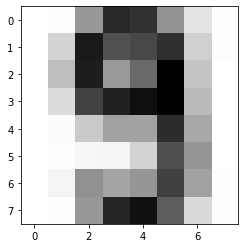

In [ ]:
# Solution from the book
def average_img(i):
  imgs = [img for img,target in zip(digits.images, digits.target) if target==i]
  return sum(imgs) / len(imgs)
plt.imshow(average_img(9), cmap=plt.cm.gray_r)

In [ ]:
# Exercise 16.3—Mini Project
def specific_classifier(input_vector):
  result = np.zeros(10)
  input = np.matrix.flatten(input_vector)/15.
  for i in range(10):
    tmp = np.matrix.flatten(average_img(i))/15.
    result[i] = np.dot(input, tmp)/64
  return result

def my_test_digit_classify(classifier,test_count=1000):
  correct = 0
  for img, target in zip(digits.images[:test_count], digits.target[:test_count]):
    output = classifier(img)
    answer = list(output).index(max(output))
    if answer == target:
      correct += 1
  return (correct/test_count)

In [ ]:
my_test_digit_classify(specific_classifier, test_count=10000)

0.1606

In [ ]:
# Solution from the book
avg_digits = [np.matrix.flatten(average_img(i)) for i in range(10)]
def compare_to_avg(v):
  return [np.dot(v,avg_digits[i]) for i in range(10)]

def test_digit_classify(classifier,test_count=1000):
  correct = 0
  for img, target in zip(digits.images[:test_count], digits.target[:test_count]):
    v = np.matrix.flatten(img)/15.
    output = classifier(v)
    answer = list(output).index(max(output))
    if answer == target:
      correct += 1
  return (correct/test_count)

test_digit_classify(compare_to_avg, test_count=10000)

0.1606